<a href="https://colab.research.google.com/github/konrado10/NaukaGIT/blob/main/Zad126.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasyfikacja

## Zad 15

### Regresja Logistyczna

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn

sns.set(font_scale=1.3)
np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))
np.random.seed(42)
sklearn.__version__

'0.22.2.post1'

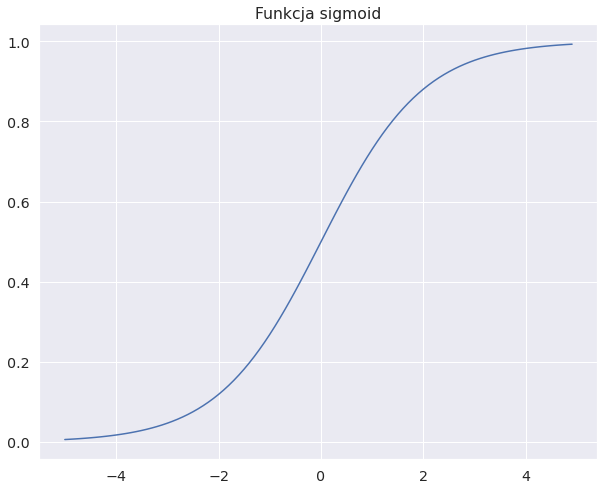

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5,5,0.1)
y = sigmoid(x)

plt.figure(figsize = (10,8))
plt.plot(x,y)
plt.title('Funkcja sigmoid')
plt.show()

In [5]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(raw_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

data.shape

(569, 30)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [10]:
X_train

array([[12.89, 13.12, 81.89, 515.90, 0.07, 0.04, 0.02, 0.01, 0.13, 0.06, ..., 13.62, 15.54, 87.40, 577.00, 0.10, 0.11, 0.12, 0.05, 0.23, 0.07],
       [13.40, 20.52, 88.64, 556.70, 0.11, 0.15, 0.14, 0.08, 0.21, 0.07, ..., 16.41, 29.66, 113.30, 844.40, 0.16, 0.39, 0.51, 0.21, 0.36, 0.11],
       [12.96, 18.29, 84.18, 525.20, 0.07, 0.08, 0.04, 0.02, 0.19, 0.06, ..., 14.13, 24.61, 96.31, 621.90, 0.09, 0.23, 0.16, 0.07, 0.32, 0.07],
       [17.75, 28.03, 117.30, 981.60, 0.10, 0.13, 0.17, 0.08, 0.17, 0.06, ..., 21.53, 38.54, 145.40, 1437.00, 0.14, 0.38, 0.64, 0.20, 0.30, 0.09],
       [20.58, 22.14, 134.70, 1290.00, 0.09, 0.13, 0.16, 0.10, 0.18, 0.05, ..., 23.24, 27.84, 158.30, 1656.00, 0.12, 0.29, 0.39, 0.19, 0.29, 0.06],
       [15.28, 22.41, 98.92, 710.60, 0.09, 0.11, 0.05, 0.03, 0.17, 0.06, ..., 17.80, 28.03, 113.80, 973.10, 0.13, 0.33, 0.36, 0.12, 0.32, 0.10],
       [13.78, 15.79, 88.37, 585.90, 0.09, 0.07, 0.01, 0.01, 0.14, 0.06, ..., 15.27, 17.50, 97.90, 706.60, 0.11, 0.11, 0.04, 0.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.35, -1.44, -0.41, -0.39, -1.86, -1.27, -0.83, -0.95, -1.73, -0.94, ..., -0.54, -1.66, -0.59, -0.53, -1.51, -0.89, -0.75, -0.92, -0.93, -0.81],
       [-0.20, 0.31, -0.13, -0.28, 1.08, 0.86, 0.73, 0.90, 1.18, 1.47, ..., 0.04, 0.69, 0.19, -0.05, 1.13, 0.92, 1.22, 1.44, 1.15, 1.57],
       [-0.33, -0.22, -0.32, -0.36, -1.58, -0.46, -0.60, -0.76, 0.28, -0.50, ..., -0.44, -0.15, -0.32, -0.45, -1.63, -0.11, -0.54, -0.72, 0.53, -0.62],
       [1.03, 2.09, 1.05, 0.92, 0.32, 0.56, 1.05, 0.93, -0.33, -0.48, ..., 1.11, 2.17, 1.17, 1.00, 0.38, 0.86, 1.87, 1.31, 0.15, 0.42],
       [1.83, 0.70, 1.76, 1.78, -0.33, 0.63, 0.97, 1.27, -0.13, -1.71, ..., 1.47, 0.39, 1.56, 1.39, -0.58, 0.30, 0.60, 1.23, 0.05, -1.41],
       [0.33, 0.76, 0.29, 0.16, -0.36, 0.05, -0.43, -0.40, -0.27, 0.08, ..., 0.33, 0.42, 0.21, 0.18, -0.05, 0.55, 0.48, 0.15, 0.48, 0.82],
       [-0.10, -0.81, -0.14, -0.19, -0.53, -0.69, -0.98, -1.00, -1.48, -0.57, ..., -0.20, -1.33, -0.27, -0.30, -1.03, -0.94, -1.17, -1.24, -1.

In [12]:
scaler.mean_

array([14.12, 19.20, 91.89, 654.92, 0.10, 0.10, 0.09, 0.05, 0.18, 0.06, 0.40, 1.21, 2.86, 40.13, 0.01, 0.03, 0.03, 0.01, 0.02, 0.00, 16.21, 25.51, 106.89, 873.72, 0.13, 0.25, 0.27, 0.11, 0.29, 0.08])

In [13]:
scaler.scale_

array([3.53, 4.23, 24.28, 356.02, 0.01, 0.05, 0.08, 0.04, 0.03, 0.01, 0.29, 0.54, 2.09, 47.97, 0.00, 0.02, 0.03, 0.01, 0.01, 0.00, 4.78, 6.02, 33.04, 564.58, 0.02, 0.15, 0.20, 0.06, 0.06, 0.02])

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = log_reg.predict(X_test)
y_pred[:30]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [16]:
y_prob = log_reg.predict_proba(X_test)
y_prob[:30]

array([[0.12, 0.88],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.96, 0.04],
       [0.42, 0.58],
       [0.00, 1.00],
       [0.05, 0.95],
       [0.99, 0.01],
       [0.01, 0.99],
       [0.85, 0.15],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.08, 0.92],
       [0.01, 0.99],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.01, 0.99],
       [0.00, 1.00],
       [1.00, 0.00]])

Accuracy 0.9790209790209791


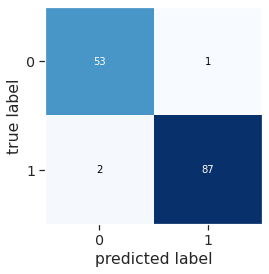

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

print(f'Accuracy {accuracy_score(y_test, y_pred)}')

In [19]:
def plot_confusion_matrix(cm):
    # klasyfikacja binarna
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [20]:
def plot_confusion_matrix(cm):
    import plotly.figure_factory as ff
    import pandas as pd
    
    columns = ['pred_'+str(i) for i in range(cm.shape[0])]
    index = ['true_'+str(i) for i in range(cm.shape[0])]
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns = columns, index = index[::-1])

    fig = ff.create_annotated_heatmap(z = cm.values, x = list(cm.columns), y = list(cm.index),
                                      colorscale = 'ice', showscale = True, reversescale = True)
    
    fig.update_layout(width = 800, height = 800, title = 'Confusion matrix', font_size = 14)
    fig.show()

plot_confusion_matrix(cm)

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



## Zad 16

### K - Najbliższych sąsiadów

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn

sns.set(font_scale=1.3)
np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))
np.random.seed(42)
sklearn.__version__

'0.22.2.post1'

In [24]:
from sklearn.datasets import load_iris

raw_data = load_iris()
raw_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [25]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

data[:5]

array([[5.10, 3.50, 1.40, 0.20],
       [4.90, 3.00, 1.40, 0.20],
       [4.70, 3.20, 1.30, 0.20],
       [4.60, 3.10, 1.50, 0.20],
       [5.00, 3.60, 1.40, 0.20]])

In [26]:
target[:5]

array([0, 0, 0, 0, 0])

In [27]:
all_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
df = pd.DataFrame(data = np.c_[data, target], columns = all_data['feature_names']+ ['class'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
class,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [33]:
df['class'].value_counts()

2.0    50
1.0    50
0.0    50
Name: class, dtype: int64

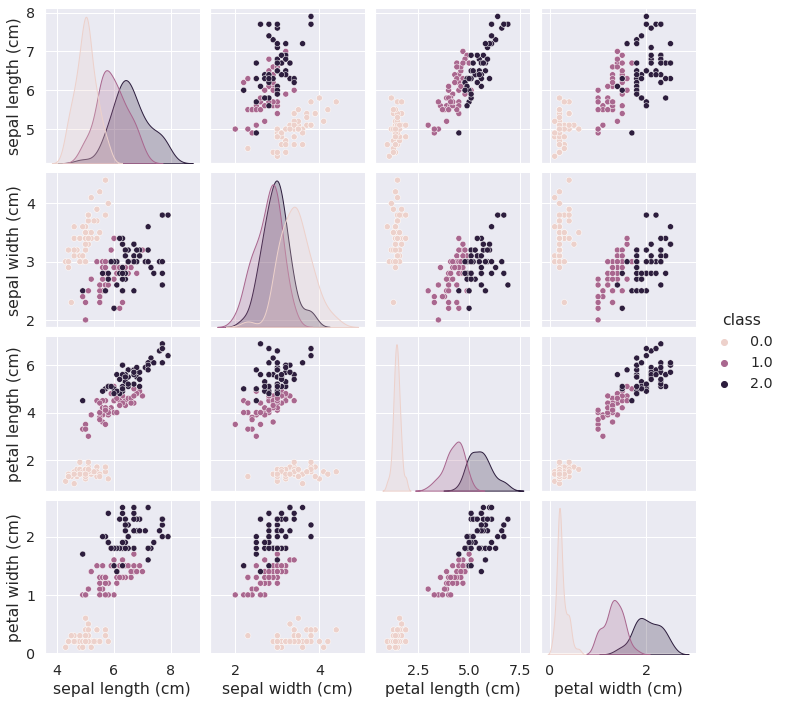

In [35]:
sns.pairplot(df, vars = all_data['feature_names'], hue = 'class')

In [36]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [38]:
data = data[:, :2]
data

array([[5.10, 3.50],
       [4.90, 3.00],
       [4.70, 3.20],
       [4.60, 3.10],
       [5.00, 3.60],
       [5.40, 3.90],
       [4.60, 3.40],
       [5.00, 3.40],
       [4.40, 2.90],
       [4.90, 3.10],
       [5.40, 3.70],
       [4.80, 3.40],
       [4.80, 3.00],
       [4.30, 3.00],
       [5.80, 4.00],
       [5.70, 4.40],
       [5.40, 3.90],
       [5.10, 3.50],
       [5.70, 3.80],
       [5.10, 3.80],
       [5.40, 3.40],
       [5.10, 3.70],
       [4.60, 3.60],
       [5.10, 3.30],
       [4.80, 3.40],
       [5.00, 3.00],
       [5.00, 3.40],
       [5.20, 3.50],
       [5.20, 3.40],
       [4.70, 3.20],
       [4.80, 3.10],
       [5.40, 3.40],
       [5.20, 4.10],
       [5.50, 4.20],
       [4.90, 3.10],
       [5.00, 3.20],
       [5.50, 3.50],
       [4.90, 3.60],
       [4.40, 3.00],
       [5.10, 3.40],
       [5.00, 3.50],
       [4.50, 2.30],
       [4.40, 3.20],
       [5.00, 3.50],
       [5.10, 3.80],
       [4.80, 3.00],
       [5.10, 3.80],
       [4.60,

In [41]:
import plotly.express as px
df = pd.DataFrame(data = np.c_[data, target], columns=['sepal_length', 'sepal_width', 'class'])
px.scatter(df, x = 'sepal_length', y = 'sepal_width', color = 'class', width = 800)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

classfier = KNeighborsClassifier(n_neighbors = 5)
classfier.fit(data, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

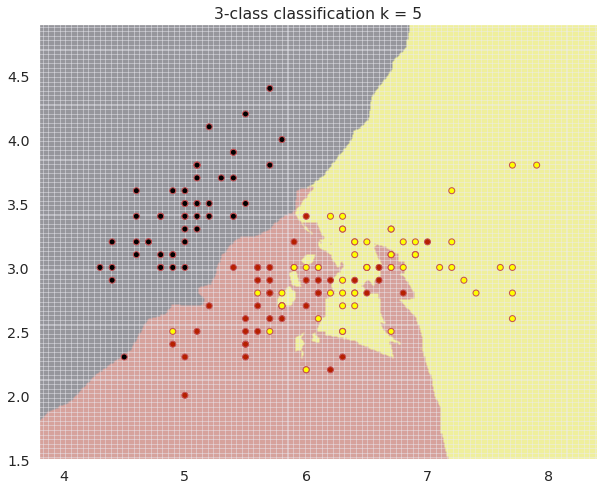

In [54]:
x_min, x_max = data[:,0].min() - 0.5, data[:,0].max() + 0.5
y_min, y_max = data[:,1].min() - 0.5, data[:,1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(),yy.ravel()]
Z = classfier.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize = (10,8))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha = 0.1)
plt.scatter(data[:,0], data[:,1], c = target, cmap = 'gnuplot', edgecolors = 'r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('3-class classification k = 5')
plt.show()

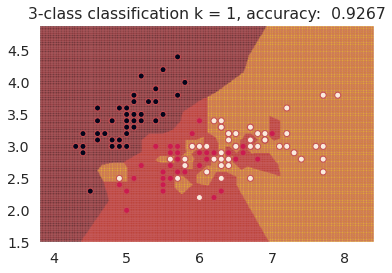

In [56]:
def plot_decision_boundries(i = 1):
    plt.Figure(figsize = (10,8))
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(data,target)
    accurancy = classifier.score(data,target)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(mesh)
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap = 'gnuplot', alpha = 0.1, edgecolors = 'r')
    plt.scatter(data[:,0], data[:,1], c = target, edgecolors='r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'3-class classification k = {i}, accuracy: {accurancy: .4f}')
    plt.show()

plot_decision_boundries()

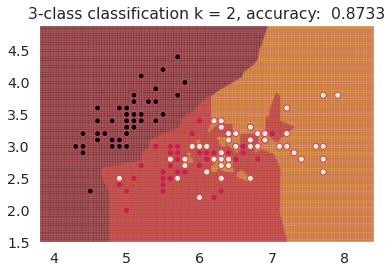

In [57]:
plot_decision_boundries(2)

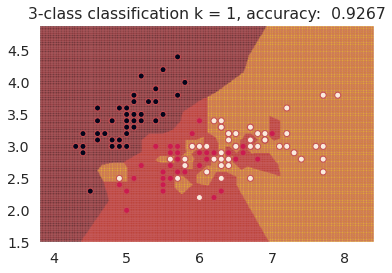

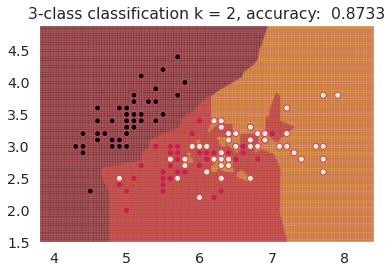

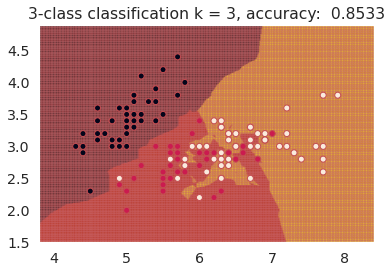

In [63]:
def plot_K_nearest_point(k = 1, X = data, y = target):
    for i in range(1,k+1):
        plt.Figure(figsize = (40,40))
        #plt.subplot(3,2,i)
        classifier = KNeighborsClassifier(n_neighbors = i)
        classifier.fit(X,y)
        accurancy = classifier.score(X,y)
        x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
        y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        mesh = np.c_[xx.ravel(), yy.ravel()]
        Z = classifier.predict(mesh)
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap = 'gnuplot', alpha = 0.1, edgecolors = 'r')
        plt.scatter(X[:,0], X[:,1], c = y, edgecolors='r')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(f'3-class classification k = {i}, accuracy: {accurancy: .4f}')
        plt.show()

plot_K_nearest_point(3)

## Zad 17

### Drzewa decyzyjne

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

sns.set(font_scale=1.3)
np.random.seed(42)

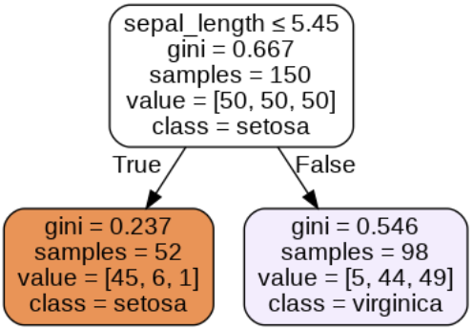

In [72]:
Image('https://storage.googleapis.com/esmartdata-courses-files/ml-course/Picture1.png')

Współczynnik giniego

In [73]:
1 - (50/150)**2*3

0.6666666666666667

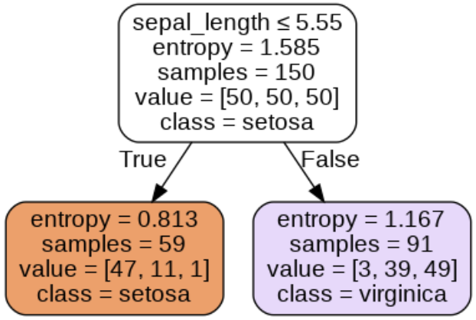

In [74]:
Image('https://storage.googleapis.com/esmartdata-courses-files/ml-course/Picture2.png')

Entropia

In [75]:
-((50/150)* np.log2(50/150)+(50/150)* np.log2(50/150)+(50/150)* np.log2(50/150))

1.584962500721156

In [78]:
from scipy.stats import entropy

print(entropy([0.5,0.5], base = 2))
print(entropy([0.2,0.8], base = 2))
print(entropy([0.0,1], base = 2))

1.0
0.7219280948873623
0.0


In [81]:
p = np.arange(0.01, 1.0, 0.01)
q = 1-p
pq = np.c_[p,q]
pq[:10]

array([[0.01, 0.99],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.04, 0.96],
       [0.05, 0.95],
       [0.06, 0.94],
       [0.07, 0.93],
       [0.08, 0.92],
       [0.09, 0.91],
       [0.10, 0.90]])

In [84]:
entropies = [entropy(pars) for pars in pq]
entropies[:10]

[0.056001534354847345,
 0.098039113279732,
 0.13474216817976675,
 0.167944147734173,
 0.1985152433458726,
 0.22696752250060448,
 0.25363894692169137,
 0.2787693717685874,
 0.30253782309749805,
 0.32508297339144826]

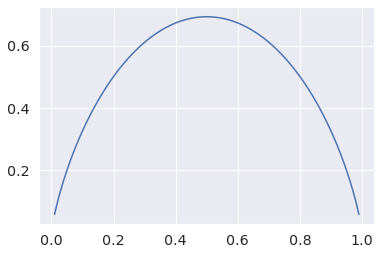

In [83]:
plt.plot(p,entropies)

## Zad 18

### Drzewa decyzyjne

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.datasets import load_iris

sns.set(font_scale=1.3)
np.random.seed(42)

In [86]:
raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

In [87]:
feature_names = [name.replace(' ','_') for name in all_data['feature_names']]
target_names = all_data['target_names']

In [88]:
data.shape

(150, 4)

In [89]:
feature_names

['sepal_length_(cm)',
 'sepal_width_(cm)',
 'petal_length_(cm)',
 'petal_width_(cm)']

In [90]:
df=pd.DataFrame(data = np.c_[data, target], columns=feature_names+['target'])
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



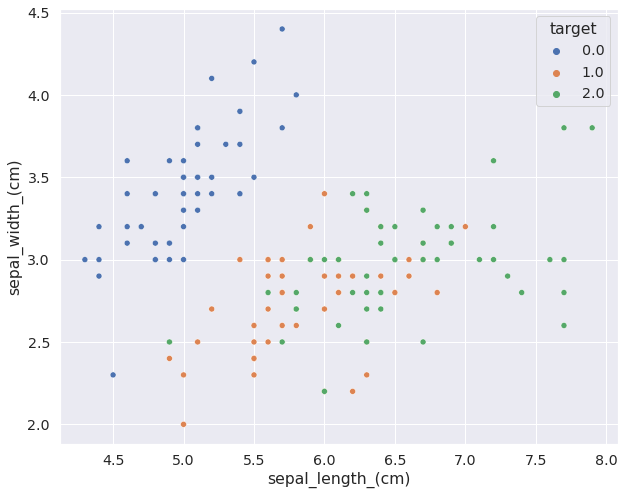

In [102]:
plt.figure(figsize=(10,8))
sns.scatterplot('sepal_length_(cm)', 'sepal_width_(cm)', data = df, hue = 'target', palette = sns.color_palette()[:3])

In [103]:
data = df.copy()
data = data[['sepal_length_(cm)', 'sepal_width_(cm)', 'target']]
target = data.pop('target')

In [104]:
data = data.values
data

array([[5.10, 3.50],
       [4.90, 3.00],
       [4.70, 3.20],
       [4.60, 3.10],
       [5.00, 3.60],
       [5.40, 3.90],
       [4.60, 3.40],
       [5.00, 3.40],
       [4.40, 2.90],
       [4.90, 3.10],
       [5.40, 3.70],
       [4.80, 3.40],
       [4.80, 3.00],
       [4.30, 3.00],
       [5.80, 4.00],
       [5.70, 4.40],
       [5.40, 3.90],
       [5.10, 3.50],
       [5.70, 3.80],
       [5.10, 3.80],
       [5.40, 3.40],
       [5.10, 3.70],
       [4.60, 3.60],
       [5.10, 3.30],
       [4.80, 3.40],
       [5.00, 3.00],
       [5.00, 3.40],
       [5.20, 3.50],
       [5.20, 3.40],
       [4.70, 3.20],
       [4.80, 3.10],
       [5.40, 3.40],
       [5.20, 4.10],
       [5.50, 4.20],
       [4.90, 3.10],
       [5.00, 3.20],
       [5.50, 3.50],
       [4.90, 3.60],
       [4.40, 3.00],
       [5.10, 3.40],
       [5.00, 3.50],
       [4.50, 2.30],
       [4.40, 3.20],
       [5.00, 3.50],
       [5.10, 3.80],
       [4.80, 3.00],
       [5.10, 3.80],
       [4.60,

In [105]:
target = target.values.astype('int16')

In [106]:
from sklearn.tree import DecisionTreeClassifier

classfier = DecisionTreeClassifier(max_depth = 1, random_state =42)
classfier.fit(data, target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



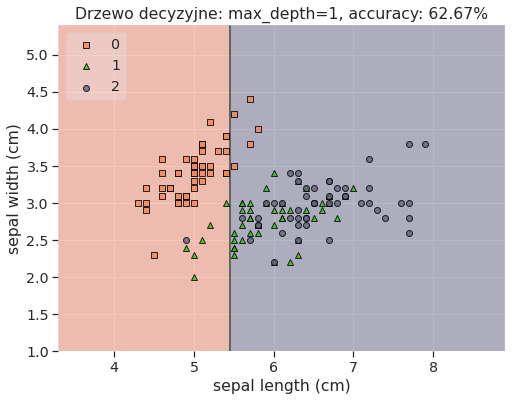

In [109]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

acc = classfier.score(data, target)

plt.figure(figsize=(8, 6))
plot_decision_regions(data, target, classfier, legend=2, colors=colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%')
plt.show()

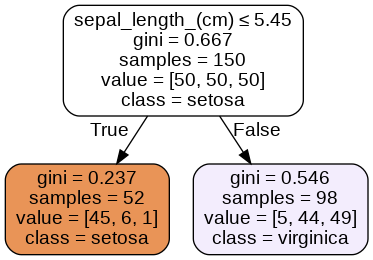

In [112]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
        
dot_data = StringIO()
export_graphviz(classfier,
                out_file=dot_data,
                feature_names=feature_names[:2],
                class_names=target_names,
                special_characters=True,
                rounded=True,
                filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png(), width=300)

In [121]:
def make_decision_tree(max_depth = 1, data = data, target = target):
    
    from sklearn.tree import DecisionTreeClassifier
    from mlxtend.plotting import plot_decision_regions

    classfier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    classfier.fit(data, target)

    dot_data = StringIO()
    export_graphviz(classfier,
                out_file=dot_data,
                feature_names=feature_names[:2],
                class_names=target_names,
                special_characters=True,
                rounded=True,
                filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    acc = classfier.score(data, target)

    colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
    plt.figure(figsize=(8, 6))
    ax = plot_decision_regions(data, target, classfier, legend=0, colors=colors)
    handles, labels = ax.get_legend_handles_labels()
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.title(f'Drzewo decyzyjne: max_depth={max_depth}, accuracy: {acc * 100:.2f}%')
    
    return Image(graph.create_png(), width=200 + max_depth * 200)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



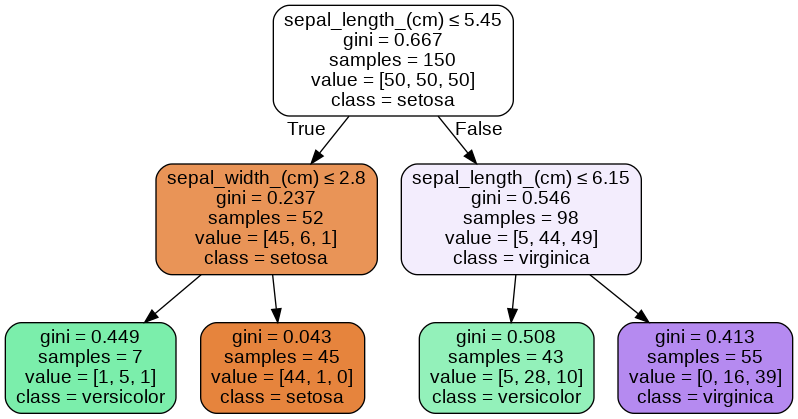

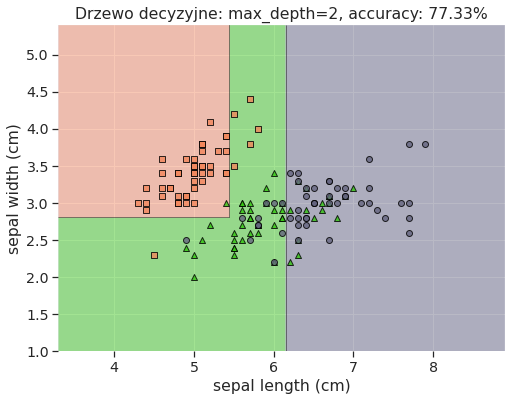

In [118]:
make_decision_tree(2)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



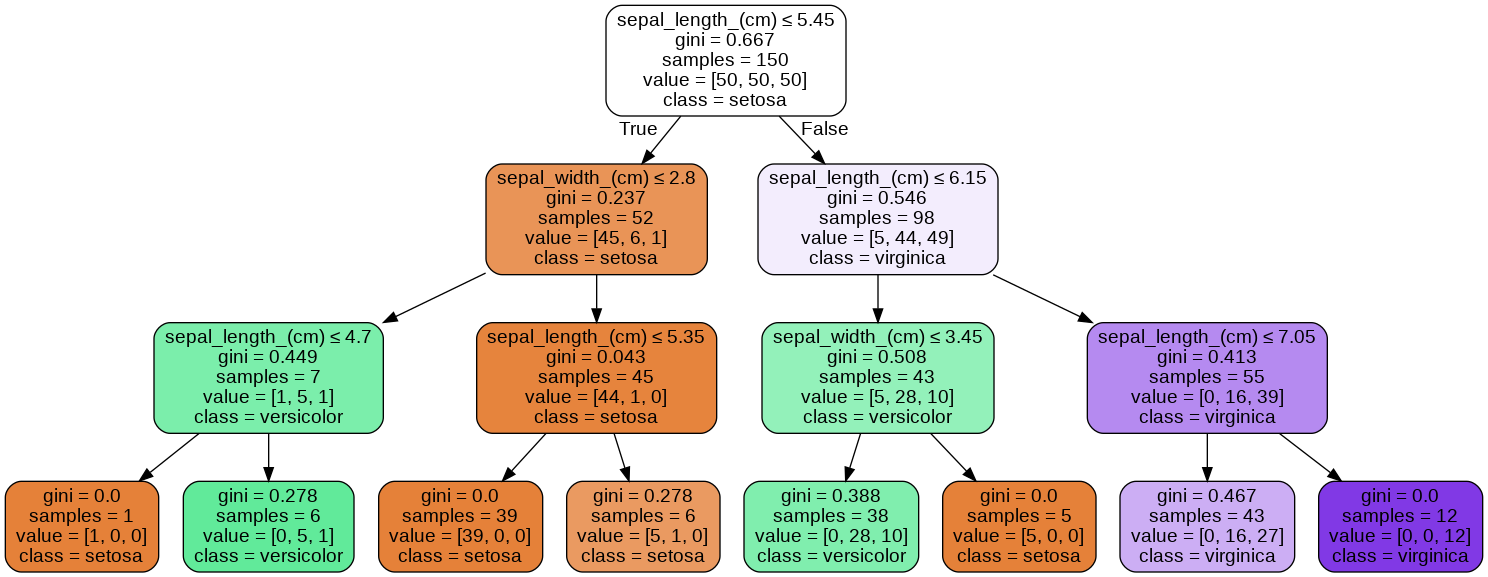

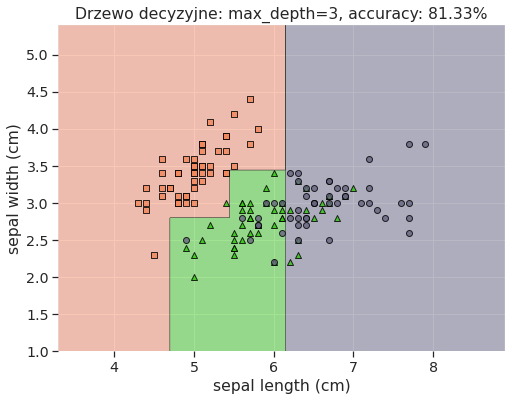

In [119]:
make_decision_tree(3)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



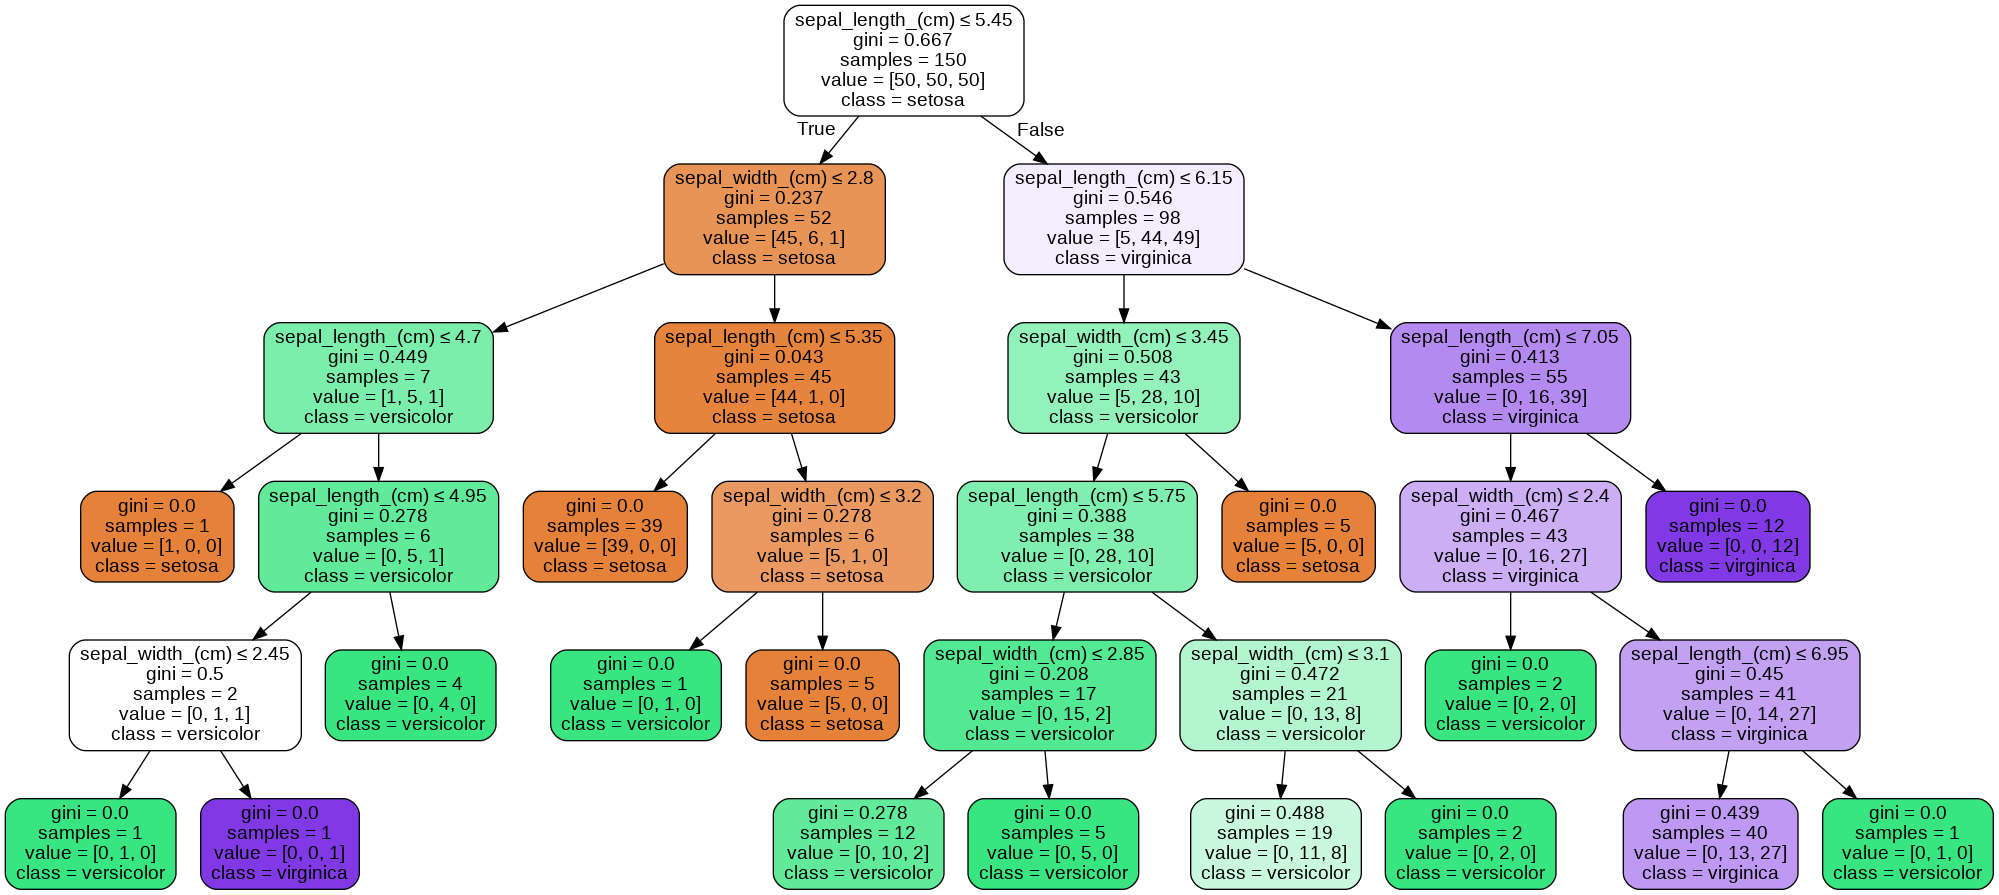

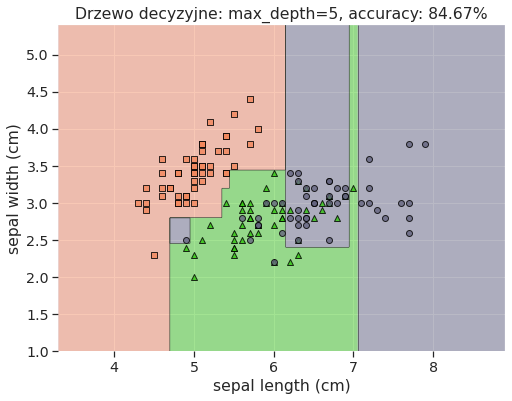

In [120]:
make_decision_tree(5)

## Zad 19

### Lasy losowe

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(font_scale=1.3)
np.random.seed(42)

In [30]:
from sklearn.datasets import load_iris

raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

In [31]:
df = pd.DataFrame(data = np.c_[data, target], columns = feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [32]:
data = data[:, [0, 1]]
target = df['target'].apply(int).values

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

[0 0 0 0 0]


In [33]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=42)

classifier.fit(data, target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [34]:
classifier.score(data,target)

0.9266666666666666

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



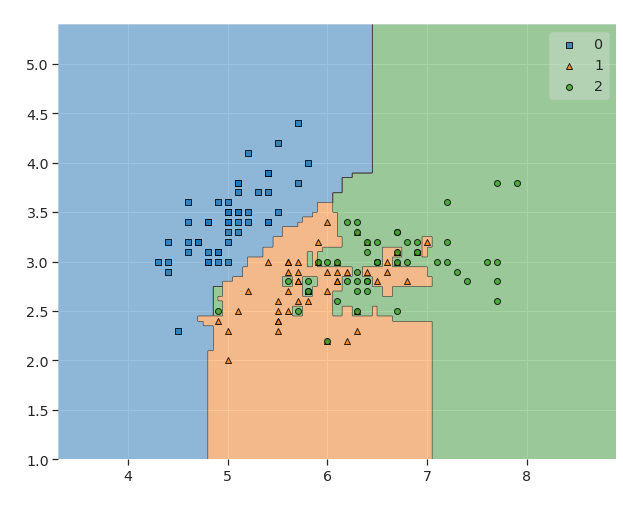

In [35]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,8))
plot_decision_regions(data, target, classifier)
plt.xlabel(feature_names[0], color = 'white')
plt.ylabel(feature_names[1], color = 'white')
plt.title('Las losowy n_estimators = 100', color = 'white')
plt.show()

In [36]:
data = all_data['data']
targets = all_data['target']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, targets)

X_train.shape

(112, 4)

In [38]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [39]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

1.0

In [40]:
classifier.feature_importances_

array([0.10968334, 0.02954459, 0.43763486, 0.42313721])

In [41]:
features = pd.DataFrame(data = {'feature': feature_names, 'feature_importance': classifier.feature_importances_})

px.bar(features, x = 'feature', y = 'feature_importance', width = 700, height = 700)

## Zad 20

### Maszyna wektórów nośnych SVC

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)
np.random.seed(42)

In [61]:
from sklearn.datasets import load_iris

raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

df = pd.DataFrame(np.c_[data, target], columns=feature_names + ['target'])
# df = df[(df['target'] == 0.0) | (df['target'] == 1.0)]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [62]:
data = df.iloc[:, [2, 1]].values
target = df['target'].apply(int).values

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[1.4 3.5]
 [1.4 3. ]
 [1.3 3.2]
 [1.5 3.1]
 [1.4 3.6]]

[0 0 0 0 0]


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

X_train.shape

(112, 2)

In [64]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X_train)

scalar.transform(X_train)
scalar.transform(X_test)

array([[-1.3579945 ,  0.21594294],
       [ 1.18481324,  0.45779902],
       [-1.41712957,  0.9415112 ],
       [ 0.47519248, -0.50962533],
       [-0.17529322, -0.26776924],
       [ 1.4213535 , -0.26776924],
       [-1.65366982, -0.02591315],
       [ 1.12567818, -0.02591315],
       [-1.41712957,  0.21594294],
       [-1.47626463,  0.69965511],
       [-1.18058931,  0.9415112 ],
       [ 1.30308337,  1.42522337],
       [ 0.17951716, -0.26776924],
       [-1.47626463,  1.18336728],
       [-1.41712957,  0.9415112 ],
       [ 1.00740805,  0.9415112 ],
       [ 0.65259767, -0.02591315],
       [-1.47626463,  0.9415112 ],
       [-1.29885944,  0.9415112 ],
       [ 1.59875869, -0.02591315],
       [-1.47626463, -0.02591315],
       [ 1.06654312,  0.45779902],
       [-1.41712957,  1.90893555],
       [-0.23442829, -2.44447402],
       [ 0.35692235, -1.23519359],
       [ 0.88913792,  0.21594294],
       [-0.11615816, -1.47704968],
       [-1.3579945 ,  1.90893555],
       [ 0.12038209,

In [65]:
from sklearn.svm import SVC

classifier = SVC(C=1.0, kernel = 'linear')

classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
classifier.score(X_train, y_train)

0.9732142857142857

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



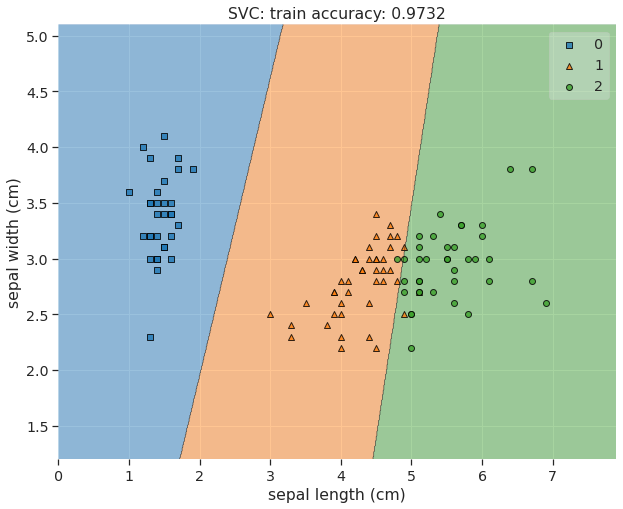

In [67]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {classifier.score(X_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



Text(0.5, 1.0, 'SVC: test accuracy: 0.9211')

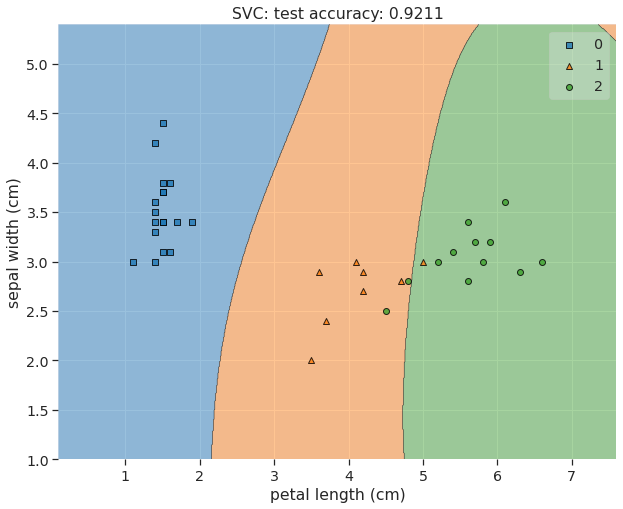

In [74]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: test accuracy: {classifier.score(X_test, y_test):.4f}')

In [69]:
classifier = SVC(C=1.0, kernel = 'rbf')

classifier.fit(X_train, y_train)

classifier.score(X_test, y_test)

0.9210526315789473

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



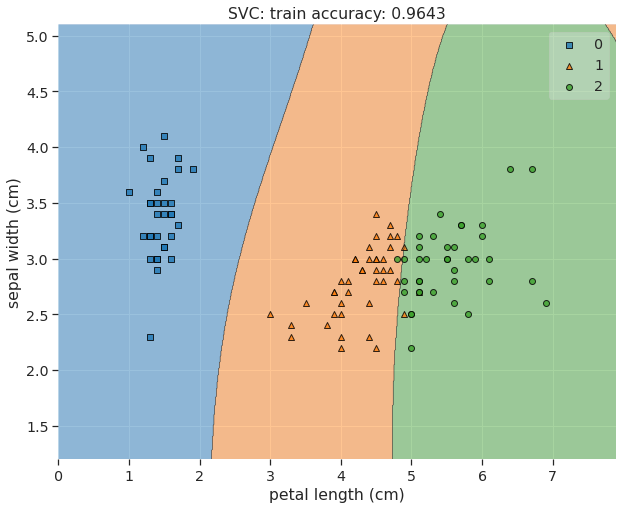

In [72]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {classifier.score(X_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



Text(0.5, 1.0, 'SVC: test accuracy: 0.9211')

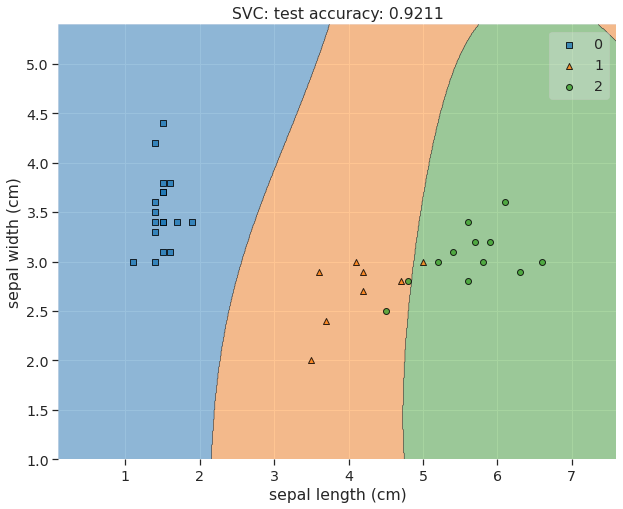

In [71]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title(f'SVC: test accuracy: {classifier.score(X_test, y_test):.4f}')

## Zad 21

### Naiwny klasifikator bayesowski - Gaussowski klasyfikator bayesowski

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)
np.random.seed(42)
np.set_printoptions(precision=6, suppress = True)

In [76]:
pogoda = ['słonecznie', 'deszczowo', 'pochmurno', 'deszczowo', 'słonecznie', 'słonecznie',
          'pochmurno', 'pochmurno', 'słonecznie']
temperatura = ['ciepło', 'zimno', 'ciepło', 'ciepło', 'ciepło', 'umiarkowanie',
               'umiarkowanie', 'ciepło', 'zimno']

spacer = ['tak', 'nie', 'tak', 'nie', 'tak', 'tak', 'nie', 'tak', 'nie']      

raw_df = pd.DataFrame(data={'pogoda': pogoda, 'temperatura': temperatura, 'spacer': spacer})
df = raw_df.copy()
df

,pogoda,temperatura,spacer
0,słonecznie,ciepło,tak
1,deszczowo,zimno,nie
2,pochmurno,ciepło,tak
3,deszczowo,ciepło,nie
4,słonecznie,ciepło,tak
5,słonecznie,umiarkowanie,tak
6,pochmurno,umiarkowanie,nie
7,pochmurno,ciepło,tak
8,słonecznie,zimno,nie


In [77]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['spacer'] = encoder.fit_transform(spacer)
df

,pogoda,temperatura,spacer
0,słonecznie,ciepło,1
1,deszczowo,zimno,0
2,pochmurno,ciepło,1
3,deszczowo,ciepło,0
4,słonecznie,ciepło,1
5,słonecznie,umiarkowanie,1
6,pochmurno,umiarkowanie,0
7,pochmurno,ciepło,1
8,słonecznie,zimno,0


In [78]:
df = pd.get_dummies(data = df, columns=['pogoda', 'temperatura'], drop_first=True)

In [79]:
df

,spacer,pogoda_pochmurno,pogoda_słonecznie,temperatura_umiarkowanie,temperatura_zimno
0,1,0,1,0,0
1,0,0,0,0,1
2,1,1,0,0,0
3,0,0,0,0,0
4,1,0,1,0,0
5,1,0,1,1,0
6,0,1,0,1,0
7,1,1,0,0,0
8,0,0,1,0,1


In [80]:
data = df.copy()
target = data.pop('spacer')

In [81]:
data

,pogoda_pochmurno,pogoda_słonecznie,temperatura_umiarkowanie,temperatura_zimno
0,0,1,0,0
1,0,0,0,1
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0
5,0,1,1,0
6,1,0,1,0
7,1,0,0,0
8,0,1,0,1


In [82]:
target

0    1
1    0
2    1
3    0
4    1
5    1
6    0
7    1
8    0
Name: spacer, dtype: int64

In [83]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(data, target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
model.score(data, target)

0.7777777777777778

In [86]:
data.iloc[[0]]

,pogoda_pochmurno,pogoda_słonecznie,temperatura_umiarkowanie,temperatura_zimno
0,0,1,0,0


In [87]:
model.predict(data.iloc[[0]])

array([1])

In [88]:
encoder.classes_

array(['nie', 'tak'], dtype='<U3')

In [92]:
model.predict_proba(data.iloc[[0]])

array([[0.000006, 0.999994]])

## Zad 22

## Ocena modelu klasyfikacji

In [93]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [95]:
y_true = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])
y_pred = np.array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

Accuracy

In [96]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.8

In [97]:
results = pd.DataFrame(data = {'y_true': y_true, 'y_pred': y_pred})

In [98]:
results

,y_true,y_pred
0,1,0
1,0,0
2,1,1
3,1,1
4,0,0
5,1,1
6,1,0
7,0,0
8,1,1
9,0,1


In [99]:
results = results.sort_values(by = 'y_true')
results = results.reset_index(drop = True)
results['sample'] = results.index + 1
results

,y_true,y_pred,sample
0,0,0,1
1,0,0,2
2,0,0,3
3,0,0,4
4,0,0,5
5,0,0,6
6,0,0,7
7,0,0,8
8,0,1,9
9,0,1,10


In [100]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=results['sample'], y=results['y_true'], mode='markers', name='y_true'), row=1, col=1)
fig.add_trace(go.Scatter(x=results['sample'], y=results['y_pred'], mode='markers', name='y_pred'), row=2, col=1)
fig.update_layout(width=800, height=600, title='Klasyfikator binarny')
fig.show()

In [101]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm

array([[ 8,  2],
       [ 4, 16]])

In [120]:
def plot_confusion_matrix(y_true, y_pred):
    import plotly.figure_factory as ff
    from sklearn.metrics import accuracy_score
    import pandas as pd
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    columns = ['pred_'+str(i) for i in range(cm.shape[0])]
    index = ['true_'+str(i) for i in range(cm.shape[0])]
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns = columns, index = index[::-1])

    fig = ff.create_annotated_heatmap(z = cm.values, x = list(cm.columns), y = list(cm.index),
                                      colorscale = 'ice', showscale = True, reversescale = True)
    
    fig.update_layout(width = 400, height = 400, title = f'Confusion matrix, accuracy: {acc}', font_size = 14)
    fig.show()

plot_confusion_matrix(y_true, y_pred)

In [105]:
cm_df = pd.DataFrame(cm, columns=['pred_0','pred_1'], index = ['true_0', 'true_1'])
cm_df

,pred_0,pred_1
true_0,8,2
true_1,4,16


In [106]:
tn, fp, fn, tp = cm.ravel()

In [109]:
# False Positive Rate

fpr = fp / (fp+tn)
print(fpr)

0.2


In [108]:
# False Negative Rate

fnr = fn / (fn + tp)
print(fnr)

0.2


In [111]:
# Precision

precision = tp / (tp + fp)
print(precision)

0.8888888888888888


In [112]:
# Recall

recall = tp /(tp + fn)

print(recall)

0.8


In [117]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.89      0.80      0.84        20

    accuracy                           0.80        30
   macro avg       0.78      0.80      0.78        30
weighted avg       0.81      0.80      0.80        30



In [119]:
def plot_roc_curve(y_true, y_pred):
    #Binary classification
    import plotly.graph_objects as go
    from sklearn.metrics import roc_curve
    from sklearn.metrics import accuracy_score
    
    acc = accuracy_score(y_true, y_pred)

    fpr, tpr, thresh = roc_curve(y_true, y_pred, pos_label = 1)
    roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr})

    fig = go.Figure(data = [go.Scatter(x = roc.fpr, y = roc.tpr, line_color = 'red', name = 'ROC Curve'),
                            go.Scatter(x = [0,1], y = [0,1], mode = 'lines', line_dash = 'dash', line_color='navy')],
                    layout = go.Layout(xaxis_title = 'False Positive Rate',
                                       yaxis_title = "True Positive Rate",
                                       title = f'ROC Curve, accuracy: {acc}',
                                       showlegend = False, 
                                       width = 800,
                                       height = 600))
    fig.show()

plot_roc_curve(y_true, y_pred)

In [121]:
y_true = np.array([1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2])
y_pred = np.array([0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2])

from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.7241379310344828

In [124]:
def plot_confusion_matrix(y_true, y_pred):
    import plotly.figure_factory as ff
    from sklearn.metrics import accuracy_score
    import pandas as pd
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    columns = ['pred_'+str(i) for i in range(cm.shape[0])]
    index = ['true_'+str(i) for i in range(cm.shape[0])]
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns = columns, index = index[::-1])

    fig = ff.create_annotated_heatmap(z = cm.values, x = list(cm.columns), y = list(cm.index),
                                      colorscale = 'ice', showscale = True, reversescale = True)
    
    fig.update_layout(width = 400, height = 400, title = f'Confusion Matrix, accuracy: {acc:.2f}', font_size = 14)
    fig.show()

plot_confusion_matrix(y_true, y_pred)